In [ ]:
# Copyright 2025 Andrew Lehr
# The MIT License

## Fig 3d,e

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from submanifolds.utils import get_root
import os

# figure storage
fig_dir = get_root() + 'figures/figure_3/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
    print('Created ' + fig_dir)
else:
    print(fig_dir + ' already exists')
    
save_figs_flag = 0

Created /home/andrew/Documents/projects/submanifolds/submission_clustered_inhibition/rate_network/figures/figure_3/


In [3]:
N = 1000
_n_subspaces = [10,20,50,100,200,500,1000]
_p = np.arange(0,1,.05).round(2)
n_p = len(_p)
n_s = len(_n_subspaces)

In [4]:
np.random.seed(0)

overlap_max = np.zeros((n_s, n_p))
overlap_mean = np.zeros((n_s, n_p))
overlap_std = np.zeros((n_s, n_p))

for n_i, n_subspaces in enumerate(_n_subspaces):
    for p_i, p in enumerate(_p):

        k = int((1-p)*N)
        overlaps = []
        neurons = []
        # append subset of active neurons for subspace 0
        neurons.append(np.random.choice(N, k, replace=False))

        # loop through remaining subspaces
        for i in range(1,n_subspaces):
            # append subset of active neurons for subspace i
            neurons.append(np.random.choice(N, k, replace=False))
            # loop through subspaces up to i and measure overlap
            for j in range(0, i):
                # overlap is the number of elements in the intersection
                overlaps.append(len(np.intersect1d(neurons[i], neurons[j])))

        # store the data
        overlap_max[n_i, p_i] = np.max(overlaps) / k
        overlap_mean[n_i, p_i] = np.mean(overlaps) / k
        overlap_std[n_i, p_i] = np.std(overlaps) / k
        
        # print status
        print('\rCurrent setting: ' + str(n_i) + ', ' + str(p_i), end='')

Current setting: 6, 19

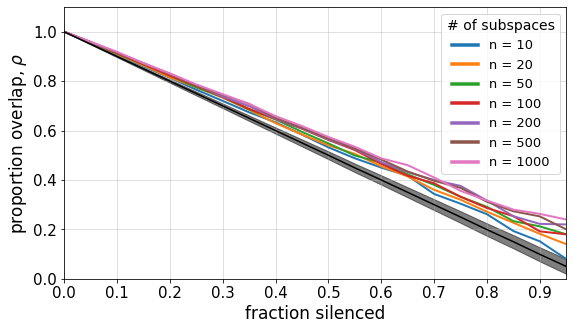

In [6]:
fname = 'active_neuron_overlap.pdf'

plt.figure(figsize=(9,5))
plt.plot(_p, overlap_max.T, linewidth=2, label=['n = ' + str(n) for n in _n_subspaces])
plt.plot(_p, overlap_mean[-1,:], color='black')
i = -1
plt.fill_between(_p, overlap_mean[i,:] + overlap_std[i,:], overlap_mean[i,:] - overlap_std[i,:], color='black', alpha=0.5)
plt.xticks(np.arange(0,1,0.1), fontsize=15)
plt.yticks(np.arange(0,1.1,0.2), fontsize=15)
plt.xlabel('fraction silenced', fontsize=17)
plt.ylabel('proportion overlap, $\u03C1$', fontsize=17)
plt.xlim(0,.95)
plt.ylim(0,1.1)
leg = plt.legend(title='# of subspaces', fontsize=13, title_fontsize=14, loc='upper right')
#plt.legend(fontsize=12, title_fontsize=13)
#plt.yscale('log')

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(3.5)

plt.grid(alpha=0.5)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

In [7]:
def choose(n, k):
    return np.math.factorial(n) / ( np.math.factorial(k) * np.math.factorial(n-k) ) if n>k else 0

In [8]:
from collections import defaultdict

In [9]:
N = 1000
_p_ = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
overlaps = np.linspace(0,1,200).round(4)

prob_dist = defaultdict(dict)
inds = defaultdict(dict)
for p_i, p in enumerate(_p_):
    k = int(np.round(1-p, 1) * N)
    prob = np.zeros(k)
    for m in range(k): 
        prob[m] = choose(k, m) * choose(N-k, k-m) / choose(N, k) 
    prob_dist[p_i] = prob
    inds[p_i] = np.linspace(0,1,k)

In [10]:
np.sum(prob_dist[3])

1.0

In [11]:
colors = ['#586ba4', '#f68e5f', '#f3c759', '#f5dd90', 
          '#067d7a', '#77c1b3',   '#b63653',
          '#6d2a2a', '#361a1a', '#191414', '#465865', '#928876',
          '#fc9234', '#fd6626', '#44867d', '#177070', '#404a50']

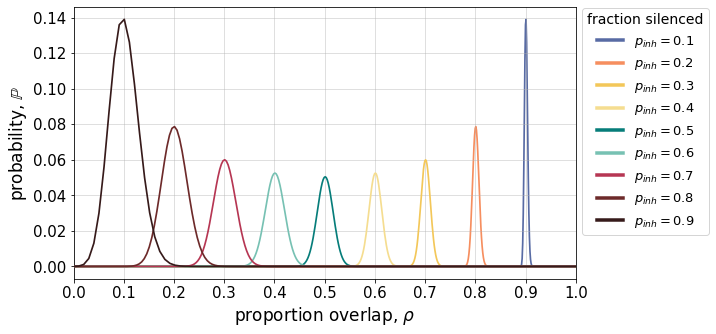

In [12]:
fname = 'active_neuron_overlap_probability_distribution.pdf'
plt.figure(figsize=(9,5))
for i in range(len(_p_)):
    plt.plot(inds[i], prob_dist[i], linewidth=1.7, color=colors[i], zorder=i, label='$p_{inh} = $'+str(_p_[i]))
#plt.xticks(np.arange(0,1,0.05))
plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,1)
plt.xlabel('proportion overlap, $\u03C1$', fontsize=17)
#plt.ylabel('$\mathbb{P}(|S_1 \cap S_2| / |S_1| = \u03C1)$', fontsize=17)
plt.ylabel('probability, $\mathbb{P}$', fontsize=17)
#plt.ylabel('Probability, $\mathbb{P}(|S_1 \cap S_2| / |S_1| = \u03C1)$', fontsize=17)
leg = plt.legend(title='fraction silenced', fontsize=13, title_fontsize=14, bbox_to_anchor=(1, 1.02))
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(3.5)

plt.grid(alpha=0.5)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()